# Unstructured Data Analytics HW1

Name:Bochen Wang

Andrew ID:bochenw

Collaborators (if none, say "none"; do *not* leave this blank):Consulted ChatGPT

Reminder: you should not be sharing code.

In [22]:
pip install nbconvert[webpdf]

zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.


**Reminder:** As stated in Lecture 1, homework assignments this semester will be submitted as PDFs and, in particular, we will not be re-running your code. Please make sure that you have run all your code cells so that the code cell outputs are actually displayed. To save your Jupyter notebook as a PDF, we recommend simply using your browser's print functionality and using that to print/save the notebook as a PDF.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it (as a PDF, as stated above). Again, we will *not* be re-running your code.

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size (and when you save it as a PDF, the PDF will have a crazy number of pages).**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [4]:
########################################################################
######################### Write your code here #########################
########################################################################

import glob

path = './HW1_Dataset/*.txt'

for filename in glob.glob(path):
    with open(filename, 'r', encoding = 'utf-8') as file:
        print(filename + ' ' +str(len(file.read())) +'\n')

./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580

./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435

./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034

./HW1_Dataset/The King James Version of the Bible (132).txt 4351846

./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241

./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234

./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148

./HW1_Dataset/The Odyssey by Homer (124).txt 697404

./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918

./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031

./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694

./HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt 115

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [5]:
########################################################################
######################### Write your code here #########################
########################################################################
import glob

path = './HW1_Dataset/*.txt'

file_lengths = []

for filename in glob.glob(path):
    with open(filename, 'r', encoding='utf-8') as file:
        content_length = len(file.read())
        # Append a tuple with length and filename to the list
        file_lengths.append((content_length, filename))

# Sort the list of tuples by the length in descending order
file_lengths.sort(reverse=True, key=lambda x: x[0])

# Select the top 15 files based on content length
longest_15 = file_lengths[:15]

# Print the results
for length, name in longest_15:
    print(f"{length} {name}\n")

5465100 ./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt

4351846 ./HW1_Dataset/The King James Version of the Bible (132).txt

3254333 ./HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt

3227580 ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt

3033575 ./HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt

2643849 ./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt

1534140 ./HW1_Dataset/Ulysses by James Joyce (282).txt

1378627 ./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt

1238569 ./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt

1231784 ./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt

1214387 ./HW1_Dataset/The Republic by Plato (246).txt

1200021 ./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt

1175588 ./HW1_Dataset/The Iliad by Homer (256).txt

1167141 ./HW1_Dataset

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [6]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [7]:
########################################################################
######################### Write your code here #########################
########################################################################
import glob

path = './HW1_Dataset/*.txt'

book_batches = []
count = 0

for filename in glob.glob(path):
    with open(filename, 'r', encoding='utf-8') as file:
        batches = split_into_batches(file.read(), 10000)
        count += len(batches)
        book_batches.append(batches)

print(f'Total number of batches: {count}')

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [8]:
########################################################################
######################### Write your code here #########################
########################################################################
import spacy
import glob
import re
from collections import Counter

# Load the spaCy model with disabled named entity recognition and parser to speed up processing
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])


# Initialize a Counter object to keep the term frequencies
term_frequency = Counter()

# Regular expression pattern to match only alphabetic strings
alpha_pattern = re.compile('^[a-zA-Z]+$')

# Path to the text files
path = './HW1_Dataset/*.txt'

# Process each file
for filename in glob.glob(path):
    with open(filename, 'r', encoding='utf-8') as file:
        book_text = file.read()
        
        # Split the book text into batches of 10,000 words
        for batch in split_into_batches(book_text, 10000):
            # Process the batch with spaCy
            doc = nlp(batch)
            
            # Update term frequency counts
            for token in doc:
                if alpha_pattern.match(token.lemma_):
                    term_frequency[token.lemma_] += 1

# Sort the term frequency table by frequency in descending order and get the top 50
top_50_terms = term_frequency.most_common(50)

# Print the top 50 most frequent words, along with their frequencies and ranks
for rank, (lemma, frequency) in enumerate(top_50_terms, start=1):
    print(f"{rank}. {lemma}: {frequency}")


1. the: 702465
2. be: 446420
3. and: 435424
4. of: 386347
5. to: 324409
6. I: 255129
7. a: 233423
8. in: 204252
9. he: 193622
10. have: 160548
11. that: 159010
12. it: 135431
13. his: 108536
14. you: 102595
15. with: 101227
16. they: 97561
17. not: 95519
18. for: 95320
19. as: 90702
20. she: 78524
21. but: 75599
22. my: 73983
23. do: 68754
24. at: 64947
25. on: 62833
26. by: 61274
27. this: 61240
28. we: 60873
29. which: 58868
30. all: 58636
31. say: 58348
32. from: 50095
33. so: 47999
34. or: 47810
35. her: 42838
36. one: 41123
37. man: 39585
38. their: 38418
39. what: 37851
40. no: 37808
41. there: 37209
42. will: 34946
43. if: 34898
44. go: 33897
45. when: 33587
46. an: 32517
47. come: 32358
48. would: 32202
49. see: 32024
50. who: 30934


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

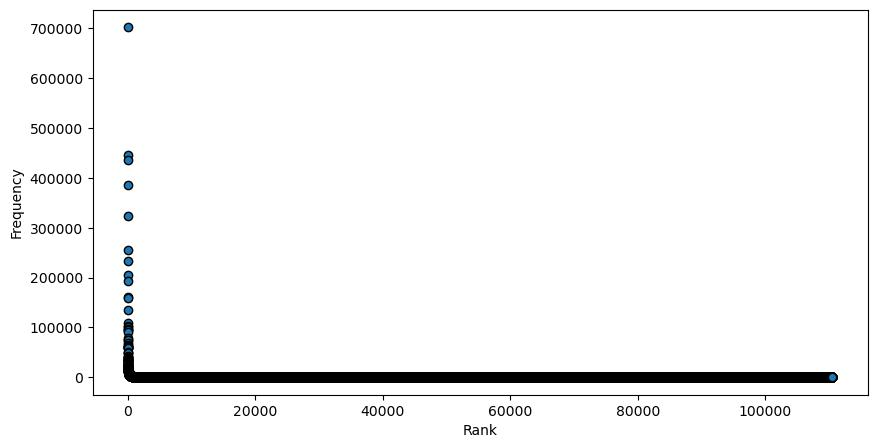

In [10]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################

import matplotlib.pyplot as plt

frequencies = [freq for word, freq in term_frequency.most_common()]

# Generate rank data
ranks = list(range(1, len(frequencies) + 1))

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(ranks, frequencies, edgecolor='black')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

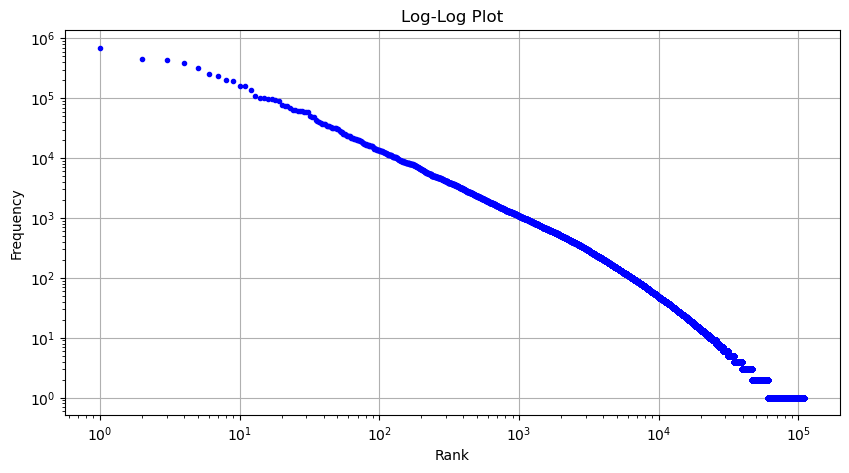

In [11]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################
plt.figure(figsize=(10, 5))
plt.loglog(ranks, frequencies, marker='.', linestyle='None', color='blue')
plt.title('Log-Log Plot')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [2 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

it resembles a line here as the rank decrease the frequecy decreases
it seems to follow the power law approximately by graph

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [13]:
total_lemmas = sum(term_frequency.values())

# Get the frequencies of the top lemmas
top_4_frequencies = sum(freq for word, freq in term_frequency.most_common(4))

top_50_frequencies = sum(freq for word, freq in term_frequency.most_common(50))
# Calculate the probability of drawing one of the top 4 lemmas
probability_top_4 = top_4_frequencies / total_lemmas

probability_top_50 = top_50_frequencies / total_lemmas
print(f'Probability of drawing one of the 4 most frequent alphabetic lemmas: {probability_top_4}')
########################################################################
######################### Write your code here #########################
########################################################################

print(f'Probability of drawing one of the 50 most frequent alphabetic lemmas: {probability_top_50}')
########################################################################
######################### Write your code here #########################
########################################################################

Probability of drawing one of the 4 most frequent alphabetic lemmas: 0.16317804093047428
Probability of drawing one of the 50 most frequent alphabetic lemmas: 0.4827400611904405


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [14]:

lemmas_occurring_once = sum(1 for lemma, freq in term_frequency.items() if freq == 1)

# Lemmas that occur fewer than 10 times
lemmas_occurring_fewer_than_ten = sum(1 for lemma, freq in term_frequency.items() if freq < 10)

# Calculate the proportions
proportion_1 = lemmas_occurring_once / total_lemmas
proportion_less_than_10 = lemmas_occurring_fewer_than_ten / total_lemmas

print(f"Occur only once: {proportion_1}")

print(f"Occur fewer than 10 times: {proportion_less_than_10}")
########################################################################
######################### Write your code here #########################
########################################################################

Occur only once: 0.004095233450332512
Occur fewer than 10 times: 0.007151940141377757


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

/Users/bochenwang/anaconda3/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


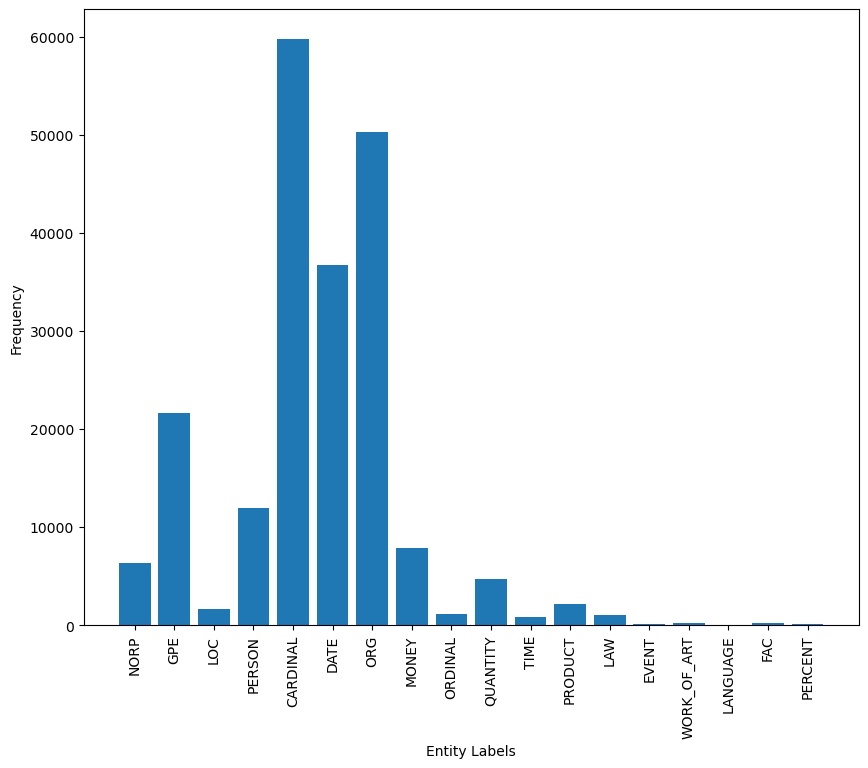

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

########################################################################
######################### Write your code here #########################
########################################################################

for doc in reuters_nlp:
    # Update the label_counter with the entity labels
    label_counter.update(entity.label_ for entity in doc.ents)

labels = []
frequencies = []
for label, frequency in label_counter.items():
    labels.append(label)
    frequencies.append(frequency)

# Plotting
plt.figure(figsize=(10, 8))  
plt.bar(labels, frequencies)
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()

**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [16]:
########################################################################
######################### Write your code here #########################
########################################################################

from collections import defaultdict

# use dictionary to count
org_entities = defaultdict(int)
gpe_entities = defaultdict(int)

for doc in reuters_nlp:
    # Create sets to store unique entities for this document
    orgs_in_doc = set()
    gpes_in_doc = set()
    
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            orgs_in_doc.add(ent.text.lower())  # Add lowercase entity text
        elif ent.label_ == 'GPE':
            gpes_in_doc.add(ent.text.lower())  # Add lowercase entity text
    
    # Update the counts for this article
    for org in orgs_in_doc:
        org_entities[org] += 1
    for gpe in gpes_in_doc:
        gpe_entities[gpe] += 1

top_10_orgs = sorted(org_entities.items(), key=lambda item: item[1], reverse=True)[:10]
top_10_gpes = sorted(gpe_entities.items(), key=lambda item: item[1], reverse=True)[:10]

print("Top 10 ORG Entities:")
for entity, count in top_10_orgs:
    print(f"{entity}: {count}")

print("\nTop 10 GPE Entities:")
for entity, count in top_10_gpes:
    print(f"{entity}: {count}")


Top 10 ORG Entities:
cts: 1115
reuters: 444
the securities and exchange commission: 248
ec: 231
fed: 230
treasury: 228
cts net: 179
the u.s. agriculture department: 170
usda: 154
the bank of england: 143

Top 10 GPE Entities:
u.s.: 1631
japan: 579
the united states: 383
u.k.: 297
canada: 295
new york: 251
west germany: 236
washington: 230
london: 216
brazil: 201


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [21]:
# 

########################################################################
######################### Write your code here #########################
########################################################################

total_articles = len(reuters_nlp)
opec_counter = 0
gpe_counter = defaultdict(int)
co_occurrence_counter = defaultdict(int)

for doc in reuters_nlp:
    #give the condition that has opec and org
    has_opec = any(ent.text.lower() == 'opec' and ent.label_ == 'ORG' for ent in doc.ents)
    if has_opec:
        opec_counter += 1#count opec
    unique_gpes = {ent.text.lower() for ent in doc.ents if ent.label_ == 'GPE'}
    for gpe in unique_gpes:
        gpe_counter[gpe] += 1 #count gpe
        if has_opec:
            co_occurrence_counter[gpe] += 1 #count co_occurance

# Now calculate PMI for each GPE with respect to 'opec'
pmi_values = {}
for gpe in gpe_counter:
    p_opec = opec_counter / total_articles
    p_gpe = gpe_counter[gpe] / total_articles
    p_co_occurrence = co_occurrence_counter[gpe] / total_articles
    # Calculate PMI partially without log
    pmi = p_co_occurrence / (p_opec * p_gpe)
    pmi_values[gpe] = pmi

# Sort GPEs by PMI and take the top 50
top_50_gpes_by_pmi = sorted(pmi_values.items(), key=lambda item: item[1], reverse=True)[:50]

print("Top 50 PMI:")
for gpe, pmi in top_50_gpes_by_pmi:
    print(f"{gpe}: {pmi}")

Top 50 PMI:
brent: 88.42622950819673
ula fields: 88.42622950819673
emirates: 88.42622950819673
the lake charles: 88.42622950819673
bethesda: 88.42622950819673
franco: 88.42622950819673
gabon: 88.42622950819673
opec: 88.42622950819673
saudi arabia reiterates commitment to: 88.42622950819673
yanbu: 88.42622950819673
aguarico: 88.42622950819673
el salado: 88.42622950819673
jubail: 88.42622950819673
ras tanurah: 88.42622950819673
ju'aymah: 88.42622950819673
tripoli: 88.42622950819673
doha: 88.42622950819673
guayaquil: 88.42622950819673
tihamah: 88.42622950819673
redoglia: 88.42622950819673
carrington: 88.42622950819673
materialy: 88.42622950819673
vienna: 75.16229508196722
riyadh: 70.74098360655738
saudi arabia's: 60.79303278688525
balao: 58.950819672131146
quito: 58.950819672131146
qatar: 51.015132408575035
dubai: 50.52927400468384
caracas: 49.125683060109296
nigeria: 44.21311475409836
nordic: 44.21311475409836
kahan: 44.21311475409836
statfjord: 44.21311475409836
oseberg: 44.213114754098

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***
There are some none gpe in this. I think that the entity name can not be fully recoginzed by this code

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/8heZamsAnE8S7VTWA